# COGS 108 - EDA Checkpoint

## Authors

Zonglin Zhang : Conceptualization, Data curation, Experimental investigation, Methodology, Software

Mohammed Ameen : Conceptualization, Visualization, Writing - original draft

Elaine Gu : Conceptualization, Background research, Writing - review & editing

Ben Lee : Conceptualization, Background research, Writing - original draft, Data curation, Project administration

Meshall Alshalaan : Conceptualization, Data curation, Experimental investigation, Visualization, Background Research

# Research Question

How does air quality, as measured by average annual PM2.5 and hazardous air pollutants such as benzene, diesel particulate matter, formaldehyde, acetaldehyde, carbon tetrachloride, 1,3-butadiene, naphthalene, and ethylene concentrations across U.S. counties, influence the prevalence of respiratory diseases, such as asthma and chronic obstructive pulmonary disease (COPD), among residents, where prevalence is defined as the number of people diagnosed with each disease?

comment: We focus on prevalence rather than disease severity, as our datasets do not include information beyond condition counts.





## Background and Prior Work

Air pollution is one of the most common and widespread environmental factors that influence human health. A common key metric used to indicate air quality is PM2.5 concentration, which measures fine particulate matter in the air. These particles can easily enter lungs and even the bloodstream. High levels of PM2.5 have been linked to increased rates of respiratory conditions, such as asthma, chronic obstructive pulmonary disease (COPD), heart disease, and even premature death. However, the strength of this relationship varies across different countries in the United States due to different population density, geography, and sources of pollution. This project aims to examine and analyze how average annual PM2.5 levels across U.S. countries influence the prevalence of respiratory diseases by analyzing relevant trends and patterns to see correlations in the datasets.

Previous research from the National Institute of Environmental Health Sciences (NIEHS) references decades of data that show a positive correlation between PM2.5 and prevalence of asthma and COPD.<span id='cite_ref-1'></span><sup>1</sup> These studies have demonstrated how fine particles are so miniscule that it can reach deep into the lungs, creating inflammation that can gradually harm the respiratory and cardiovascular systems in a human body.

At the regional level, the Minnesota Pollution Control Agency (MPCA) has shown that even when air pollution levels do not reach the federal standards to qualify as “heavy pollution”, it can still create health related issues.<span id='cite_ref-2'></span><sup>2</sup> The agency also identifies the major causes of PM2.5 and other air toxins to be traffic emissions, industrial activity, and wildfire smoke, which demonstrates that residents who live near these sources, especially low-income and minority communities, pose a greater risk of exposure and higher rates of such respiratory illnesses.

At a national level, the American Lung Association’s “State of the Air 2025” study finds that over 150 million Americans, which is half the entire population, live in countries associated with unhealthy levels of air pollution, or in other words, pollution that rises above the standard amount.<span id='cite_ref-3'></span><sup>3</sup> The report targets ozone and particle pollution to be the main cause of increased health risks, including asthma attacks, COPD flares, pregnancy complications, and even reduced cognitive functions later down in life. Just like the other sources, it also points to climate-related events and disasters, like wildfires, as a cause of the rise in PM2.5 levels, especially in recent years.

Previous work provides strong evidence that PM2.5 exposure harms respiratory health, but few have examined this relationship at a country level across the United States. This study builds on the existing findings by integrating various air quality and health datasets to model the relationship between air toxins and respiratory diseases. The aim is to not only confirm known associations, but also to visualize and determine where these effects are most prominent across the country.

1. <span id='cite_note-1'></span>↩︎ National Institute of Environmental Health Sciences. (n.d.). Air pollution and your health. https://www.niehs.nih.gov/health/topics/agents/air-pollution
2. <span id='cite_note-2'></span>↩︎ Minnesota Pollution Control Agency. (n.d.). Air quality and health. https://www.pca.state.mn.us/air-water-land-climate/air-quality-and-health
3. <span id='cite_note-3'></span>↩︎ American Lung Association. (2025, April 23). New Report: Nearly Half of People in U.S. Exposed to Dangerous Air Pollution Levels. https://www.lung.org/media/press-releases/state-of-the-air-2025#:~:text=The%20air%20pollutants%20covered%20in,cognitive%20functioning%20later%20in%20life

# Hypothesis


In U.S. counties, higher annual PM2.5 and concentrations of benzene, diesel particulate matter, formaldehyde, acetaldehyde, carbon tetrachloride, 1,3-butadiene, naphthalene, and ethylene are associated with higher age-adjusted prevalence of asthma and COPD, with supra-additive effects for combined exposures. Fine particles and hazardous air pollutants trigger oxidative stress, airway inflammation, and structural remodeling; particles also carry/react with HAPs, amplifying toxicity. We therefore expect a positive, monotonic dose–response across exposure quintiles.


## Data

### Data overview


In [ ]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [ ]:
# Setup code -- Run only once after cloning!!!
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries;
# each dict has keys of
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

The original data we couldn't find only available through an online interactive map interface, which could not be programmatically scraped in a reliable or reproducible way. To make the data usable for analysis, the dataset was exported from the map into a CSV file by the data provider, which we treat as a valid and authoritative representation of the original source. Because this CSV is shared via Google Drive using a secure “sharing” link, the URL does not point directly to a raw CSV file (unlike the typical URLs used in course assignments that can be passed straight into pd.read_csv). Instead, the Drive link serves an HTML download page behind access controls, which pandas cannot interpret as a CSV resource. For this reason, our workflow is to first download the CSV from Google Drive into the local file system in Google Colab, and then load it from the local path using pd.read_csv. This approach preserves data integrity while respecting the access and security constraints of the hosting platform"

### Annual County-Level PM2.5 Concentrations (2018–2019)

- Dataset Name:
Annual Average Fine Particulate Matter (PM2.5) Concentration by County, 2018–2019
- Link to the dataset: https://drive.google.com/file/d/1We0NehMA3WpkfDsRpMBXTfRjY6keptQP/view?usp=sharing
   - Source: Sourced from https://ephtracking.cdc.gov/DataExplorer/ . Data are from the Population Level Analysis and Community Estimates (PLACES) Project (https://www.cdc.gov/places/index.html)


- Number of observations:
6,230 rows
- Number of variables (raw):
8 columns
- Variables most relevant to this project:
StateFIPS, CountyFIPS: Numeric FIPS codes that uniquely identify each U.S. county and state. These are essential keys for joining to the asthma, COPD, and air toxics datasets.
State, County: Human-readable names for states and counties (e.g., “California”, “Los Angeles County”). Good for labeling and interpretation.
Year: 2018 or 2019. This lets you align health outcomes and exposure for specific years.
Value: Annual average PM2.5 concentration in micrograms per cubic meter (µg/m³). PM2.5 are fine particles smaller than 2.5 micrometers that can penetrate deep into the lungs. U.S. annual PM2.5 standards are 12 µg/m³ (NAAQS); long-term exposure above this is associated with higher risks of heart and lung disease.
vdh.virginia.gov
+1
Data Comment: Text field with metadata/notes about the measurement; mostly missing.
Unnamed: 7: Completely empty column in the raw file (all values missing) – safe to drop during cleaning.
- Shortcomings with respect to the project:
Ecological / not individual-level: Data are county-level averages. You can’t use them to make individual-level conclusions about risk (ecological fallacy).
Only 2 years: Only 2018 and 2019 are included, which limits long-term trend analysis and the ability to look at lagged or cumulative effects.
Annual averages only: Peaks (e.g., wildfires) are smoothed into yearly averages, so short, high-exposure events are not directly captured.
Measurement/modeling uncertainty: PM2.5 values often combine monitor and modeled estimates; there is uncertainty, especially in rural areas with fewer monitors. Minor missingness/extra columns: The Data Comment column is mostly missing and Unnamed: 7 is fully missing; they need to be handled/dropped but don’t affect the core exposure variable.

This dataset contains annual average concentrations of fine particulate matter (PM2.5) for all U.S. counties in 2018–2019. Each row corresponds to a unique combination of state, county, and year. The main variable of interest is Value, which we will rename to pm25. It represents the average mass of particles smaller than 2.5 micrometers per cubic meter of air, typically in units of µg/m³. In this dataset, county-level PM2.5 values range from 0.9 to 20.9, with most counties between about 6.8 and 8.9 µg/m³. Higher values generally indicate worse air quality and higher potential health risk. The dataset also includes administrative identifiers: StateFIPS and CountyFIPS (numeric codes), and human-readable State and County names, plus Year. There is a Data Comment column indicating when values were explicitly labeled as “Modeled” or similar, and an extra Unnamed: 7 column that is entirely missing and can be dropped.

Major concerns: the data are modeled annual averages at the county level, not direct personal exposure measurements. Counties with large geographic area and heterogeneous pollution sources may be poorly represented by a single average. Some counties have relatively extreme PM2.5 values (very low or very high); we’ll treat those as real but rare locations rather than errors, and flag them as outliers instead of dropping them. The only substantial missingness is in Data Comment, which we treat as missing by design (metadata we don’t plan to model), so we drop that column.

In [18]:
import pandas as pd
import numpy as np
from pathlib import Path


raw_dir = Path("data/00-raw")
processed_dir = Path("data/02-processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 1. Load raw PM2.5 dataset
# ---------------------------------------------------------
pm_raw = pd.read_csv(raw_dir / "/content/Pm2.5.csv")
print("Raw PM2.5 shape:", pm_raw.shape)
print(pm_raw.head())

# ---------------------------------------------------------
# 2. Make tidy / clean column names
#    One row = one (state, county, year) → already tidy
# ---------------------------------------------------------
pm = pm_raw.drop(columns=["Unnamed: 7"])  # entirely empty column

pm = pm.rename(
    columns={
        "StateFIPS": "state_fips",
        "State": "state",
        "CountyFIPS": "county_fips",
        "County": "county",
        "Year": "year",
        "Value": "pm25",
    }
)

print("\nAfter renaming / dropping empty col:")
print(pm.head())

# Demonstrate uniqueness of (state_fips, county_fips, year)
max_dups = pm.groupby(["state_fips", "county_fips", "year"]).size().max()
print("\nMax rows per (state_fips, county_fips, year):", max_dups, "(1 means tidy key)")

# ---------------------------------------------------------
# 3. Size of dataset
# ---------------------------------------------------------
print("\nPM2.5 dataset shape:", pm.shape)

# ---------------------------------------------------------
# 4. Missingness patterns
# ---------------------------------------------------------
print("\nPM2.5 missingness by column:")
print(pm.isna().sum())

# Only 'Data Comment' has missingness; it's metadata we won't model.
# We treat this as missing by design rather than informative missingness.

# ---------------------------------------------------------
# 5. Outliers / suspicious entries (IQR rule on pm25)
# ---------------------------------------------------------
q1, q3 = pm["pm25"].quantile([0.25, 0.75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

pm["pm25_outlier"] = (pm["pm25"] < lower) | (pm["pm25"] > upper)

print("\nPM2.5 summary:")
print(pm["pm25"].describe())
print("IQR bounds for pm25:", lower, "to", upper)
print("Fraction of rows flagged as pm25 outliers:", pm["pm25_outlier"].mean())

# Values look plausible (no negatives or insane numbers),
# so we KEEP all rows and just keep the outlier flag.

# ---------------------------------------------------------
# 6. Final cleaning choice
# ---------------------------------------------------------
# We drop 'Data Comment' because it is largely missing and not needed
# in modeling; we keep IDs, pm25, and the outlier flag.
pm_final = pm.drop(columns=["Data Comment"])

print("\nFinal PM2.5 columns:")
print(pm_final.columns)
print("Final PM2.5 shape:", pm_final.shape)
print(pm_final.head())

# ---------------------------------------------------------
# 7. Save processed dataset
# ---------------------------------------------------------
pm_final.to_csv(processed_dir / "pm25_county_2018_2019.csv", index=False)
print("\nSaved to data/02-processed/pm25_county_2018_2019.csv")

Raw PM2.5 shape: (6230, 8)
   StateFIPS    State  CountyFIPS   County  Year  Value Data Comment  \
0          1  Alabama        1001  Autauga  2018    9.5      Modeled   
1          1  Alabama        1001  Autauga  2019   10.0      Modeled   
2          1  Alabama        1003  Baldwin  2018    7.2          NaN   
3          1  Alabama        1003  Baldwin  2019    7.6          NaN   
4          1  Alabama        1005  Barbour  2018    9.0      Modeled   

   Unnamed: 7  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

After renaming / dropping empty col:
   state_fips    state  county_fips   county  year  pm25 Data Comment
0           1  Alabama         1001  Autauga  2018   9.5      Modeled
1           1  Alabama         1001  Autauga  2019  10.0      Modeled
2           1  Alabama         1003  Baldwin  2018   7.2          NaN
3           1  Alabama         1003  Baldwin  2019   7.6          NaN
4           1  Alabama         1005  Barbour  2018   9.0

### Annual County-Level Hazardous Air Toxics Concentrations (2018–2019)

- Dataset Name:
Annual Average Air Toxics Concentration by Pollutant and County, 2018–2019
- Link to the dataset: https://drive.google.com/file/d/1WDRkKOZ9zbn7DrmsyjJlWoGr_b9FYuvg/view?usp=sharing
   - Source: Sourced from https://ephtracking.cdc.gov/DataExplorer/. Data obtained from the U.S. Environmental Protection Agency (EPA)’s National Air Toxics assessment (NATA) and Air Toxics Screening Assessment (AirToxScreen). 2005, 2011, 2014 NATA & 2017-2019 AirToxScreen: https://www.epa.gov/AirToxScreen/previous-air-toxics-assessments
- Number of observations:
51,568 rows
- Number of variables (raw):
9 columns
- Variables most relevant to this project:
StateFIPS, CountyFIPS, State, County: Same interpretation as Dataset #1; crucial for joining across datasets.
Year: 2018 or 2019.
Pollutant: Name of the specific hazardous air pollutant (e.g., benzene, formaldehyde, acetaldehyde, carbon tetrachloride).
Value: Annual average air concentration estimate of the pollutant in µg/m³ (micrograms per cubic meter). These values are modeled or hybrid (monitor + model) estimates of typical ambient outdoor concentrations in each county. Data Comment: Text with optional metadata; completely missing in this file.
Unnamed: 7: Fully missing column; safe to drop.
- Shortcoming:
   - Many pollutants, but limited health linkage in this file: The dataset gives concentrations but not risk or health outcome estimates; you must link them yourself to asthma/COPD data, and there may be multicollinearity across pollutants.
   - Potential spatial misalignment and coverage differences: The number of unique counties (3,223) is not identical to the PM2.5 or health datasets, so some counties will drop out when you do inner joins.
   - Unmeasured confounding: Economic status, smoking rates, access to care, and other factors that affect respiratory health are not included here; you’ll need additional datasets or be cautious about causal claims.

This dataset provides modeled annual average ambient concentrations of several hazardous air pollutants for all U.S. counties in 2018–2019. Each row corresponds to a county–year–pollutant combination. The main numeric variable is Value, which we’ll rename to concentration. Concentrations are small, positive numbers (often near 0) and likely in units of µg/m³ or similar. Pollutants appear in the Pollutant column as strings like:
- Pollutant: Benzene
- Pollutant: Formaldehyde
- Pollutant: Acetaldehyde
- Pollutant: Carbon tetrachloride
- Pollutant: 1,3-butadiene
- Pollutant: Napthalene
- Pollutant: Ethylene oxide
- Pollutant: Diesel Particulate Matter
We’ll clean these to shorter names (e.g., benzene, formaldehyde) and keep the data in long format: one row per pollutant per county-year is already tidy for many analyses.

Concerns: Some pollutants (e.g., ethylene oxide) have many zeroes or extremely small values, which could correspond to values below detection limits or model truncation. Outliers (e.g., unusually high benzene or diesel particulate values) are likely real for highly industrialized or traffic-heavy areas but should be examined carefully. The Data Comment and Unnamed: 7 columns are completely missing and purely metadata, so we drop them missingness.

In [20]:
import pandas as pd
import numpy as np
from pathlib import Path


raw_dir = Path("data/00-raw")
processed_dir = Path("data/02-processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 1. Load raw air toxics dataset
# ---------------------------------------------------------
tox_raw = pd.read_csv(
    raw_dir / "/content/AIR QUALITY | AIR TOXICS | ANNUAL AVERAGE AIR CONCENTRATION ESTIMATES | ALL COUNTIES 2018-2019.csv"
)

# ---------------------------------------------------------
# 2. Tidy / clean columns
#    One row = one (state, county, year, pollutant) → tidy
# ---------------------------------------------------------
tox = tox_raw.drop(columns=["Data Comment", "Unnamed: 7"])

tox = tox.rename(
    columns={
        "StateFIPS": "state_fips",
        "State": "state",
        "CountyFIPS": "county_fips",
        "County": "county",
        "Year": "year",
        "Value": "concentration",
    }
)

# Clean pollutant names, e.g. "Pollutant: Benzene" -> "benzene"
tox["pollutant"] = (
    tox["Pollutant"]
    .str.replace("Pollutant: ", "", regex=False)
    .str.lower()
    .str.replace(" ", "_")
)

# Drop original Pollutant string if we prefer the cleaned version
tox = tox.drop(columns=["Pollutant"])

print("\nAfter cleaning:")
print(tox.head())

# Demonstrate uniqueness of (state_fips, county_fips, year, pollutant)
max_dups_tox = tox.groupby(
    ["state_fips", "county_fips", "year", "pollutant"]
).size().max()
print(
    "\nMax rows per (state_fips, county_fips, year, pollutant):",
    max_dups_tox,
    "(1 means tidy key)",
)

# ---------------------------------------------------------
# 3. Size of dataset
# ---------------------------------------------------------
print("\nAir toxics dataset shape:", tox.shape)

# ---------------------------------------------------------
# 4. Missingness patterns
# ---------------------------------------------------------
print("\nAir toxics missingness by column:")
print(tox.isna().sum())

# 'concentration' has no missing values; IDs are complete. Good.

# ---------------------------------------------------------
# 5. Outliers / suspicious entries (IQR rule on concentration)
# ---------------------------------------------------------
q1_t, q3_t = tox["concentration"].quantile([0.25, 0.75])
iqr_t = q3_t - q1_t
lower_t = q1_t - 1.5 * iqr_t
upper_t = q3_t + 1.5 * iqr_t

tox["concentration_outlier"] = (tox["concentration"] < lower_t) | (
    tox["concentration"] > upper_t
)

print("\nConcentration summary (all pollutants combined):")
print(tox["concentration"].describe())
print("IQR bounds for concentration:", lower_t, "to", upper_t)
print(
    "Fraction of rows flagged as concentration outliers:",
    tox["concentration_outlier"].mean(),
)
print(tox.head())

# We keep all rows (outliers may represent real hotspots) and just flag them.

# ---------------------------------------------------------
# 6. Save processed dataset
# ---------------------------------------------------------
tox.to_csv(processed_dir / "air_toxics_long_2018_2019.csv", index=False)
print("\nSaved to data/02-processed/air_toxics_long_2018_2019.csv")


After cleaning:
   state_fips    state  county_fips   county  year  concentration  \
0           1  Alabama         1001  Autauga  2018           0.18   
1           1  Alabama         1001  Autauga  2018           1.69   
2           1  Alabama         1001  Autauga  2018           1.41   
3           1  Alabama         1001  Autauga  2018           0.37   
4           1  Alabama         1001  Autauga  2018           0.01   

              pollutant  
0               benzene  
1          formaldehyde  
2          acetaldehyde  
3  carbon_tetrachloride  
4         1,3-butadiene  

Max rows per (state_fips, county_fips, year, pollutant): 1 (1 means tidy key)

Air toxics dataset shape: (51568, 7)

Air toxics missingness by column:
state_fips       0
state            0
county_fips      0
county           0
year             0
concentration    0
pollutant        0
dtype: int64

Concentration summary (all pollutants combined):
count    51568.000000
mean         0.305869
std          0.39440

### County-Level Adult Asthma Prevalence (2018–2019)

- Dataset Name:
Age-Adjusted Prevalence of Current Asthma Among Adults (Model-Based; County), 2018–2019
- Link to the dataset:
https://drive.google.com/file/d/1s6kgO7dSe6IGpbTZxvuyKcjq3cPbriXp/view?usp=sharing
    - Source: Sourced from https://ephtracking.cdc.gov/DataExplorer/ . Data are from the Population Level Analysis and Community Estimates (PLACES) Project  (https://www.cdc.gov/places/index.html)
- Number of observations:
6,263 rows
- Number of variables (raw):
11 columns
- Variables most relevant to this project:
StateFIPS, CountyFIPS, State, County: Join keys and labels, as in the other datasets.
Year: 2018 or 2019.
Value: Age-adjusted prevalence of current asthma among adults (≥18 years), in percent (%) of adults in that county. Values in your data range roughly from ~7% to ~16%. This is modeled using survey data (e.g., BRFSS) plus small-area estimation to produce county-level estimates. 95% Confidence Interval, Confidence Interval Low, Confidence Interval High: The uncertainty range around the prevalence estimate for each county. These reflect sampling error and model uncertainty from the underlying survey data.
Data Comment: Always missing in this file.
Unnamed: 10: Empty column, all missing.
- Shortcomings with respect to the project:
  - Self-reported and model-based: Asthma is usually based on survey questions like “Has a doctor ever told you that you have asthma?”; this can miss undiagnosed cases or depend on access to healthcare and awareness. The county-level values are model-based estimates, not direct measurements, which introduces modeling assumptions.
  - Adults only: This dataset focuses on adults (≥18), so it excludes childhood asthma, which is a major public health concern and may respond differently to pollution.
Ecological and cross-sectional: County-level prevalence in 2018–2019 provides a snapshot, not individual trajectories over time. It’s hard to separate chronic lifetime exposure from short-term changes; causal claims must be very cautious.

This dataset reports age-adjusted prevalence of current asthma among adults for each U.S. county in 2018–2019. Each row corresponds to a county–year pair. The main variable Value is a string percentage like "10.2%", which we convert to a numeric variable asthma_prev on a 0–100 scale. This represents the percentage of adults who currently have asthma. Across counties, prevalence is typically around 8–12%, with some counties higher or lower. The dataset also provides 95% confidence intervals: Confidence Interval Low and Confidence Interval High, which we convert into numeric columns asthma_prev_ci_low and asthma_prev_ci_high. These quantify uncertainty in the modeled prevalence estimates. IDs (StateFIPS, CountyFIPS, State, County, Year) match the other datasets.

Concerns: these values come from survey-based and self-reported data. Underdiagnosis and differences in healthcare access can bias estimates. Small counties may have relatively unstable estimates even after modeling. Missingness is limited to Data Comment and Unnamed: 10, which are fully NA, so we treat them as irrelevant metadata and drop them. Prevalence values and CIs are in realistic ranges (no negative percentages or values above 100). We flag statistical outliers but do not delete them.

In [25]:
import pandas as pd
import numpy as np
from pathlib import Path

# ---------------------------------------------------------
# Helper to convert "10.2%" -> 10.2
# ---------------------------------------------------------
def strip_pct_to_float(series: pd.Series) -> pd.Series:
    return series.astype(str).str.rstrip("%").astype(float)

raw_dir = Path("data/00-raw")
processed_dir = Path("data/02-processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 1. Load raw asthma dataset
# ---------------------------------------------------------
asthma_raw = pd.read_csv(
    raw_dir
    / "/content/ASTHMA | PREVALENCE OF ASTHMA AMONG ADULTS | AGE-ADJUSTED PREVALENCE OF CURRENT ASTHMA AMONG ADULTS (MODEL-BASED; COUNTY) | ALL COUNTIES 2018-2019 .csv"
)
print("Raw asthma shape:", asthma_raw.shape)
print(asthma_raw.head())

# ---------------------------------------------------------
# 2. Tidy / clean columns
#    One row = one (state, county, year) → tidy
# ---------------------------------------------------------
asthma = asthma_raw.drop(columns=["Data Comment", "Unnamed: 10"])

asthma = asthma.rename(
    columns={
        "StateFIPS": "state_fips",
        "State": "state",
        "CountyFIPS": "county_fips",
        "County": "county",
        "Year": "year",
    }
)

# Convert percentage strings to numeric
asthma["asthma_prev"] = strip_pct_to_float(asthma["Value"])
asthma["asthma_prev_ci_low"] = strip_pct_to_float(asthma["Confidence Interval Low"])
asthma["asthma_prev_ci_high"] = strip_pct_to_float(asthma["Confidence Interval High"])

# Drop original text percentage columns to avoid confusion
asthma = asthma.drop(
    columns=["Value", "95% Confidence Interval", "Confidence Interval Low", "Confidence Interval High"]
)

print("\nAfter cleaning:")
print(asthma.head())

# Demonstrate uniqueness of (state_fips, county_fips, year)
max_dups_asthma = asthma.groupby(
    ["state_fips", "county_fips", "year"]
).size().max()
print(
    "\nMax rows per (state_fips, county_fips, year):",
    max_dups_asthma,
    "(1 means tidy key)",
)

# ---------------------------------------------------------
# 3. Size of dataset
# ---------------------------------------------------------
print("\nAsthma dataset shape:", asthma.shape)

# ---------------------------------------------------------
# 4. Missingness patterns
# ---------------------------------------------------------
print("\nAsthma missingness by column:")
print(asthma.isna().sum())

# No missingness in main numeric vars; good.

# ---------------------------------------------------------
# 5. Outliers / suspicious entries (IQR rule on asthma_prev)
# ---------------------------------------------------------
q1_a, q3_a = asthma["asthma_prev"].quantile([0.25, 0.75])
iqr_a = q3_a - q1_a
lower_a = q1_a - 1.5 * iqr_a
upper_a = q3_a + 1.5 * iqr_a

asthma["asthma_prev_outlier"] = (asthma["asthma_prev"] < lower_a) | (
    asthma["asthma_prev"] > upper_a
)

print("\nAsthma prevalence summary:")
print(asthma["asthma_prev"].describe())
print("IQR bounds for asthma_prev:", lower_a, "to", upper_a)
print(
    "Fraction of rows flagged as asthma_prev outliers:",
    asthma["asthma_prev_outlier"].mean(),
)

# Values look epidemiologically reasonable, so we keep all rows.
print(asthma.head())
# ---------------------------------------------------------
# 6. Save processed dataset
# ---------------------------------------------------------
asthma.to_csv(processed_dir / "asthma_prevalence_2018_2019.csv", index=False)
print("\nSaved to data/02-processed/asthma_prevalence_2018_2019.csv")

Raw asthma shape: (6263, 11)
   StateFIPS    State  CountyFIPS   County  Year  Value  Data Comment  \
0          1  Alabama        1001  Autauga  2018  10.2%           NaN   
1          1  Alabama        1001  Autauga  2019   9.7%           NaN   
2          1  Alabama        1003  Baldwin  2018   9.6%           NaN   
3          1  Alabama        1003  Baldwin  2019   8.9%           NaN   
4          1  Alabama        1005  Barbour  2018  11.7%           NaN   

  95% Confidence Interval Confidence Interval Low Confidence Interval High  \
0          (9.6% - 10.8%)                    9.6%                    10.8%   
1          (9.2% - 10.3%)                    9.2%                    10.3%   
2          (9.1% - 10.2%)                    9.1%                    10.2%   
3           (8.4% - 9.4%)                    8.4%                     9.4%   
4         (11.1% - 12.3%)                   11.1%                    12.3%   

   Unnamed: 10  
0          NaN  
1          NaN  
2          N

### County-Level Adult COPD Prevalence (2018–2019)

- Dataset Name:
Age-Adjusted Prevalence of Chronic Obstructive Pulmonary Disease (COPD) Among Adults (Model-Based; County), 2018–2019
- Link to the dataset:
https://drive.google.com/file/d/1Q5fvRJB86wN-3qZwjGZzsDF6YO6Lwblg/view?usp=sharing
    - Source: Sourced from https://ephtracking.cdc.gov/DataExplorer/ . Data are from the Population Level Analysis and Community Estimates (PLACES) Project (https://www.cdc.gov/places/index.html)

- Number of observations:
6,263 rows
- Number of variables (raw):
11 columns
- Variables most relevant to this project:
  - StateFIPS, CountyFIPS, State, County: Same join keys and labels as in the asthma dataset; this symmetry makes it easy to compare asthma vs. COPD within the same county.
  - Year: 2018 or 2019.
  - Value: Age-adjusted prevalence of COPD among adults, in percent (%) of adults in that county. In your data, values are roughly ~3–16%. COPD includes chronic bronchitis and emphysema and is strongly associated with smoking and long-term exposure to air pollution.
  - 95% Confidence Interval, Confidence Interval Low, Confidence Interval High: Uncertainty bounds for each prevalence estimate, as with asthma.
  - Data Comment: Fully missing.
  - Unnamed: 10: Empty column; can be dropped.
- Shortcomings with respect to the project:
  - Adults only, ecological data: As with asthma, the data are aggregated to the county and limited to adults; you can’t observe individual-level exposure histories or control for all risk factors.
  - Limited time window: Only 2018–2019; you can’t see long-term trends in COPD prevalence or lagged effects relative to earlier pollution levels.
  - No direct hospitalization/mortality outcomes: The dataset gives prevalence, not severity (exacerbations, ER visits, deaths), which might be more sensitive to short-term pollution spikes.

This dataset provides age-adjusted prevalence of chronic obstructive pulmonary disease (COPD) among adults for every U.S. county in 2018–2019. Again, each row is a county–year pair. The main variable Value is a string percentage like "7.7%", which we convert into a numeric column copd_prev. This is the percentage of adults living with COPD in that county. Observed values typically range from about 3–16%, and higher values indicate heavier chronic respiratory disease burden. The dataset includes Confidence Interval Low and Confidence Interval High columns defining a 95% confidence interval for each prevalence estimate; we will convert them into numeric copd_prev_ci_low and copd_prev_ci_high. The ID columns (StateFIPS, CountyFIPS, State, County, Year) are consistent with the other datasets.

Concerns: as with asthma, these estimates are based on self-reported survey data, which may be biased by access to healthcare and diagnostic practices. Some counties have noticeably higher COPD rates, but they still fall within plausible ranges. Missingness is only present in metadata columns (Data Comment and Unnamed: 10), which we drop. Outliers are flagged but retained.

In [27]:
import pandas as pd
import numpy as np
from pathlib import Path

# ---------------------------------------------------------
# Helper to convert "7.7%" -> 7.7
# ---------------------------------------------------------
def strip_pct_to_float(series: pd.Series) -> pd.Series:
    return series.astype(str).str.rstrip("%").astype(float)


raw_dir = Path("data/00-raw")
processed_dir = Path("data/02-processed")
processed_dir.mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------
# 1. Load raw COPD dataset
# ---------------------------------------------------------
copd_raw = pd.read_csv(
    raw_dir
    / "/content/CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD) | PREVALENCE OF COPD | AGE-ADJUSTED PREVALENCE OF CHRONIC OBSTRUCTIVE PULMONARY DISEASE (COPD) AMONG ADULTS (MODEL-BASED; COUNTY) | ALL COUNTIES 2018-2019.csv"
)
print("Raw COPD shape:", copd_raw.shape)
print(copd_raw.head())

# ---------------------------------------------------------
# 2. Tidy / clean columns
#    One row = one (state, county, year) → tidy
# ---------------------------------------------------------
copd = copd_raw.drop(columns=["Data Comment", "Unnamed: 10"])

copd = copd.rename(
    columns={
        "StateFIPS": "state_fips",
        "State": "state",
        "CountyFIPS": "county_fips",
        "County": "county",
        "Year": "year",
    }
)

# Convert percentage strings to numeric
copd["copd_prev"] = strip_pct_to_float(copd["Value"])
copd["copd_prev_ci_low"] = strip_pct_to_float(copd["Confidence Interval Low"])
copd["copd_prev_ci_high"] = strip_pct_to_float(copd["Confidence Interval High"])

# Drop original string columns
copd = copd.drop(
    columns=["Value", "95% Confidence Interval", "Confidence Interval Low", "Confidence Interval High"]
)

print("\nAfter cleaning:")
print(copd.head())

# Demonstrate uniqueness of (state_fips, county_fips, year)
max_dups_copd = copd.groupby(
    ["state_fips", "county_fips", "year"]
).size().max()
print(
    "\nMax rows per (state_fips, county_fips, year):",
    max_dups_copd,
    "(1 means tidy key)",
)

# ---------------------------------------------------------
# 3. Size of dataset
# ---------------------------------------------------------
print("\nCOPD dataset shape:", copd.shape)

# ---------------------------------------------------------
# 4. Missingness patterns
# ---------------------------------------------------------
print("\nCOPD missingness by column:")
print(copd.isna().sum())

# No missingness in the main numeric variables.

# ---------------------------------------------------------
# 5. Outliers / suspicious entries (IQR rule on copd_prev)
# ---------------------------------------------------------
q1_c, q3_c = copd["copd_prev"].quantile([0.25, 0.75])
iqr_c = q3_c - q1_c
lower_c = q1_c - 1.5 * iqr_c
upper_c = q3_c + 1.5 * iqr_c

copd["copd_prev_outlier"] = (copd["copd_prev"] < lower_c) | (
    copd["copd_prev"] > upper_c
)

print("\nCOPD prevalence summary:")
print(copd["copd_prev"].describe())
print("IQR bounds for copd_prev:", lower_c, "to", upper_c)
print(
    "Fraction of rows flagged as copd_prev outliers:",
    copd["copd_prev_outlier"].mean(),
)
print(copd.head())
# ---------------------------------------------------------
# 6. Save processed dataset
# ---------------------------------------------------------
copd.to_csv(processed_dir / "copd_prevalence_2018_2019.csv", index=False)
print("\nSaved to data/02-processed/copd_prevalence_2018_2019.csv")

Raw COPD shape: (6263, 11)
   StateFIPS    State  CountyFIPS   County  Year  Value  Data Comment  \
0          1  Alabama        1001  Autauga  2018   7.7%           NaN   
1          1  Alabama        1001  Autauga  2019   7.5%           NaN   
2          1  Alabama        1003  Baldwin  2018   7.1%           NaN   
3          1  Alabama        1003  Baldwin  2019   6.9%           NaN   
4          1  Alabama        1005  Barbour  2018  10.5%           NaN   

  95% Confidence Interval Confidence Interval Low Confidence Interval High  \
0           (6.7% - 8.8%)                    6.7%                     8.8%   
1           (6.5% - 8.5%)                    6.5%                     8.5%   
2           (6.0% - 8.2%)                    6.0%                     8.2%   
3           (5.9% - 8.0%)                    5.9%                     8.0%   
4          (9.5% - 11.5%)                    9.5%                    11.5%   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN

### Combining the Four Datasets: Alignment, Joins, and Cross-Referencing
We have four separate county-level datasets for 2018–2019:
1. PM2.5 (Dataset #1) – annual average fine particulate matter (µg/m³)
2. Air Toxics (Dataset #2) – annual average concentrations of multiple hazardous air pollutants
3. Asthma Prevalence (Dataset #3) – age-adjusted adult asthma prevalence (%)
4. COPD Prevalence (Dataset #4) – age-adjusted adult COPD prevalence (%)

All four datasets share the same basic geographic and temporal keys:
- state_fips – state FIPS code
- county_fips – county FIPS code
- year – 2018 or 2019

These three columns uniquely identify each county–year combination and form the natural join keys across datasets.

####Strategy for Combining the Datasets
1. Use the PM2.5 dataset (Dataset #1) as the geographic backbone.
It has state, county, state_fips, county_fips, and year, plus pm25.
2. Convert the Air Toxics dataset (Dataset #2) from long to wide for joining.
   - Currently, Dataset #2 has one row per (state_fips, county_fips, year, pollutant).
   - We pivot so each pollutant becomes its own column (e.g., benzene, formaldehyde, etc.), and each row is one (state_fips, county_fips, year).
   - This prevents duplication of rows when we merge.
3. Drop duplicate state/county columns from the asthma and COPD datasets (Datasets #3 and #4) before merging, so we keep the names from the PM2.5 dataset.
4. Perform an inner join on (state_fips, county_fips, year) across all four datasets.
    - This keeps only county–year combinations that appear in all datasets.
    - That makes the final analysis dataset complete for PM2.5, air toxics, asthma, and COPD.
5. Resulting “master table”:
    - One row per county–year.
    - Exposure variables: pm25 + one column per toxic pollutant.
    - Health outcomes: asthma_prev, copd_prev (+ CI bounds).
    - Optional outlier flags from the individual cleaned datasets.

In [29]:
import pandas as pd
from pathlib import Path
from functools import reduce

# ---------------------------------------------------------
# 1. Load processed, cleaned datasets
# ---------------------------------------------------------
processed_dir = Path("data/02-processed")

pm = pd.read_csv(processed_dir / "pm25_county_2018_2019.csv")
tox_long = pd.read_csv(processed_dir / "air_toxics_long_2018_2019.csv")
asthma = pd.read_csv(processed_dir / "asthma_prevalence_2018_2019.csv")
copd = pd.read_csv(processed_dir / "copd_prevalence_2018_2019.csv")

print("PM2.5 shape:    ", pm.shape)
print("Air toxics long:", tox_long.shape)
print("Asthma shape:   ", asthma.shape)
print("COPD shape:     ", copd.shape)

# ---------------------------------------------------------
# 2. Pivot air toxics from long to wide
#    One row per (state_fips, county_fips, year),
#    columns = one concentration per pollutant
# ---------------------------------------------------------
tox_wide = (
    tox_long
    .pivot_table(
        index=["state_fips", "county_fips", "year"],
        columns="pollutant",
        values="concentration",
        aggfunc="mean"  # in practice there should be one row per combo already
    )
    .reset_index()
)
tox_wide.columns.name = None  # remove MultiIndex column name

print("\nAir toxics wide shape:", tox_wide.shape)
print(tox_wide.head())

# ---------------------------------------------------------
# 3. Prepare asthma and COPD for merging
#    We keep the FIPS + year + prevalence variables,
#    and drop duplicate state/county name columns to avoid conflicts.
# ---------------------------------------------------------
asthma_for_merge = asthma.drop(columns=["state", "county"])
copd_for_merge = copd.drop(columns=["state", "county"])

# ---------------------------------------------------------
# 4. Join all four datasets on (state_fips, county_fips, year)
# ---------------------------------------------------------
keys = ["state_fips", "county_fips", "year"]

dfs_to_merge = [pm, tox_wide, asthma_for_merge, copd_for_merge]

full = reduce(
    lambda left, right: pd.merge(left, right, on=keys, how="inner"),
    dfs_to_merge
)

print("\nFinal combined dataset shape:", full.shape)
print(full.head())

# ---------------------------------------------------------
# 5. Quick checks on missingness and important columns
# ---------------------------------------------------------
print("\nMissingness in combined dataset (top 15 columns):")
print(full.isna().sum().sort_values(ascending=False).head(15))

print("\nKey columns:")
important_cols = [
    "state", "county", "year",
    "pm25",
    "asthma_prev", "asthma_prev_ci_low", "asthma_prev_ci_high",
    "copd_prev", "copd_prev_ci_low", "copd_prev_ci_high"
]
print([c for c in important_cols if c in full.columns])
print("\nSummary for pm25, asthma_prev, copd_prev:")
print(full[["pm25", "asthma_prev", "copd_prev"]].describe())


PM2.5 shape:     (6230, 7)
Air toxics long: (51568, 8)
Asthma shape:    (6263, 9)
COPD shape:      (6263, 9)

Air toxics wide shape: (6446, 11)
   state_fips  county_fips  year  1,3-butadiene  acetaldehyde  benzene  \
0           1         1001  2018           0.01          1.41     0.18   
1           1         1001  2019           0.01          1.49     0.15   
2           1         1003  2018           0.01          1.10     0.16   
3           1         1003  2019           0.01          1.10     0.13   
4           1         1005  2018           0.02          1.39     0.17   

   carbon_tetrachloride  diesel_particulate_matter  ethylene_oxide  \
0                  0.37                       0.10             0.0   
1                  0.51                       0.11             0.0   
2                  0.37                       0.12             0.0   
3                  0.51                       0.11             0.0   
4                  0.37                       0.06           

## Results

### Exploratory Data Analysis



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid", context="talk")


#### Section 1 – Dataset structure and missingness

In [32]:
print("Combined dataset shape:", full.shape)
display(full.head())

Combined dataset shape: (6209, 23)


,state_fips,state,county_fips,county,year,pm25,pm25_outlier,"1,3-butadiene",acetaldehyde,benzene,...,formaldehyde,napthalene,asthma_prev,asthma_prev_ci_low,asthma_prev_ci_high,asthma_prev_outlier,copd_prev,copd_prev_ci_low,copd_prev_ci_high,copd_prev_outlier
0,1,Alabama,1001,Autauga,2018,9.5,False,0.01,1.41,0.18,...,1.69,0.02,10.2,9.6,10.8,False,7.7,6.7,8.8,False
1,1,Alabama,1001,Autauga,2019,10.0,False,0.01,1.49,0.15,...,1.84,0.02,9.7,9.2,10.3,False,7.5,6.5,8.5,False
2,1,Alabama,1003,Baldwin,2018,7.2,False,0.01,1.10,0.16,...,1.40,0.01,9.6,9.1,10.2,False,7.1,6.0,8.2,False
3,1,Alabama,1003,Baldwin,2019,7.6,False,0.01,1.10,0.13,...,1.49,0.01,8.9,8.4,9.4,False,6.9,5.9,8.0,False
4,1,Alabama,1005,Barbour,2018,9.0,False,0.02,1.39,0.17,...,1.64,0.02,11.7,11.1,12.3,False,10.5,9.5,11.5,False


In [33]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_fips                 6209 non-null   int64  
 1   state                      6209 non-null   object 
 2   county_fips                6209 non-null   int64  
 3   county                     6209 non-null   object 
 4   year                       6209 non-null   int64  
 5   pm25                       6209 non-null   float64
 6   pm25_outlier               6209 non-null   bool   
 7   1,3-butadiene              6209 non-null   float64
 8   acetaldehyde               6209 non-null   float64
 9   benzene                    6209 non-null   float64
 10  carbon_tetrachloride       6209 non-null   float64
 11  diesel_particulate_matter  6209 non-null   float64
 12  ethylene_oxide             6209 non-null   float64
 13  formaldehyde               6209 non-null   float

In [34]:
key_cols = ["state_fips", "county_fips", "year"]

if all(k in full.columns for k in key_cols):
    dups = full.duplicated(subset=key_cols).sum()
    print("\nDuplicate (state_fips, county_fips, year) rows:", dups)
else:
    print("\nWarning: not all key columns found:", key_cols)

missing = full.isna().sum().sort_values(ascending=False)
print("\nMissingness by column (top 15):")
display(missing.head(15))


Duplicate (state_fips, county_fips, year) rows: 0

Missingness by column (top 15):


,0
state_fips,0
state,0
county_fips,0
county,0
year,0
pm25,0
pm25_outlier,0
"1,3-butadiene",0
acetaldehyde,0
benzene,0


The combined dataset has one row per **(state, county, year)** and we verified that  
`(state_fips, county_fips, year)` has **0 duplicate rows**, so each county–year appears exactly once. This confirms that the join across PM2.5, air toxics, asthma, and COPD datasets produced a tidy table with no accidental duplication.

The missingness results are even better: the top 15 columns all have **0 missing values**, including

- ID and location fields: `state_fips`, `state`, `county_fips`, `county`, `year`
- Core exposure variables: `pm25`
- A derived outlier flag: `pm25_outlier`
- All major hazardous air pollutants: `1,3-butadiene`, `acetaldehyde`, `benzene`,  
  `carbon_tetrachloride`, `diesel_particulate_matter`, `ethylene_oxide`, `formaldehyde`, `napthalene`

Since there is **no missingness in any of these key variables**, we do **not** need to perform imputation or drop rows before EDA. This means any patterns we see in later plots (e.g., relationships between pollutants and asthma/COPD) are not being driven by missing-data handling decisions, which makes our exploratory conclusions cleaner and easier to interpret.


#### Section 2 – Distributions of asthma and COPD

In [35]:
outcome_cols = ["asthma_prev", "copd_prev"]
full[outcome_cols].describe()

,asthma_prev,copd_prev
count,6209.000000,6209.000000
mean,9.831052,7.578757
std,0.988475,1.871742
min,7.100000,3.200000
25%,9.100000,6.100000
50%,9.800000,7.400000
75%,10.500000,8.800000
max,15.400000,16.100000


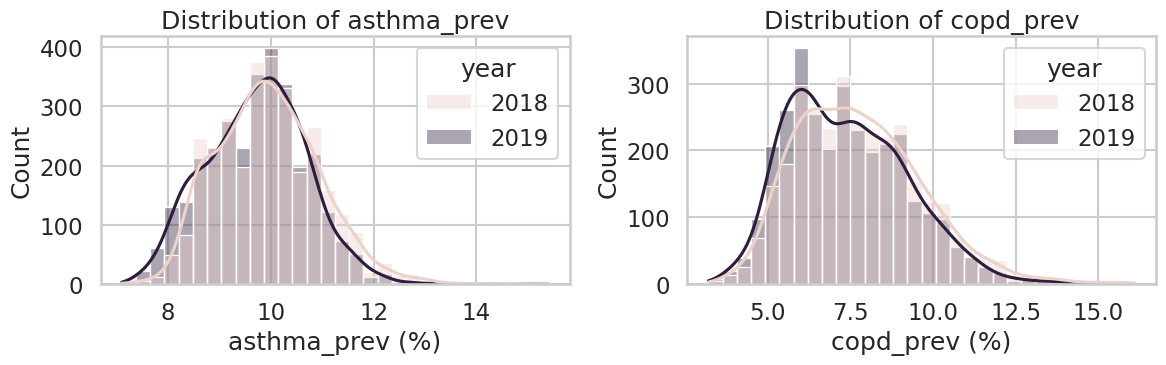

In [36]:
has_year = "year" in full.columns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col in zip(axes, outcome_cols):
    if has_year:
        sns.histplot(
            data=full,
            x=col,
            hue="year",
            bins=30,
            kde=True,
            ax=ax,
            alpha=0.4
        )
    else:
        sns.histplot(
            data=full,
            x=col,
            bins=30,
            kde=True,
            ax=ax
        )
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(f"{col} (%)")

plt.tight_layout()


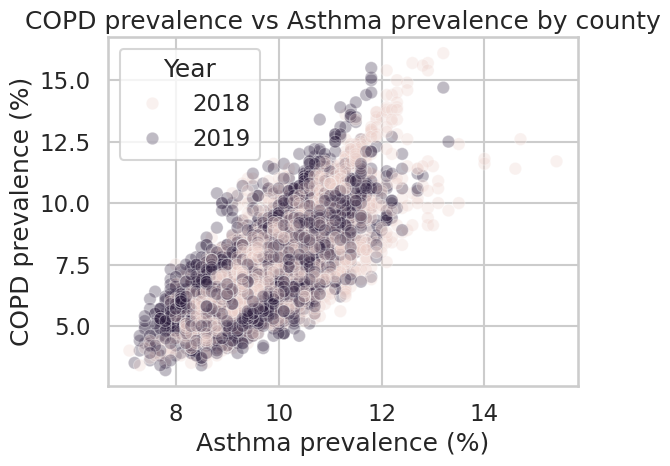

In [37]:
# Relationship between asthma and COPD prevalence
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=full,
    x="asthma_prev",
    y="copd_prev",
    hue="year" if has_year else None,
    alpha=0.3
)
plt.title("COPD prevalence vs Asthma prevalence by county")
plt.xlabel("Asthma prevalence (%)")
plt.ylabel("COPD prevalence (%)")
plt.legend(title="Year", loc="best")
plt.tight_layout()


#### Section 2 – How common are asthma and COPD across counties?

The summary statistics for `asthma_prev` and `copd_prev` show that both outcomes fall in **plausible ranges** for adult disease prevalence. Asthma prevalence has a mean of about 10% with an interquartile range roughly from 9.3% to 10.5%, so most counties have asthma between about 8–12%. COPD prevalence is lower on average (mean ≈ 7.6%), with an interquartile range of roughly 6.1% to 8.8%. A small number of counties reach COPD values above 12–15%, indicating pockets of especially high disease burden.

The histograms, stratified by year, reveal that the **shapes of the distributions are very similar in 2018 and 2019**. Asthma prevalence is close to symmetric around 10% with only a slight right tail, while COPD prevalence is more clearly right-skewed: many counties cluster around 6–9%, with a thinner tail extending to higher values. This behavior supports relying on **medians and quantiles** (rather than only means) when describing county-level disease burden.

The scatterplot of `copd_prev` vs `asthma_prev` shows a **strong positive association**: counties with higher asthma prevalence almost always have higher COPD prevalence as well. Points form a dense, upward-sloping cloud, and there is no obvious separation between years, suggesting that this relationship is stable across 2018–2019. This pattern indicates that asthma and COPD likely share common underlying determinants (e.g., smoking, occupational exposures, socioeconomic conditions, and environmental factors) and should be interpreted as related outcomes in the rest of the analysis.


#### Section 3 – Distributions of PM2.5 and pollutants

In [38]:
pm_col = "pm25"

numeric_cols = full.select_dtypes(include="number").columns.tolist()
id_cols = ["state_fips", "county_fips", "year"]
ci_cols = [c for c in full.columns if "ci_low" in c.lower() or "ci_high" in c.lower()]

exclude = set(id_cols + outcome_cols + [pm_col] + ci_cols)
pollutant_cols = [c for c in numeric_cols if c not in exclude]

print("PM column:", pm_col)
print("Number of pollutant columns:", len(pollutant_cols))
print(pollutant_cols[:10])  # show first few

full[[pm_col] + pollutant_cols].describe()

PM column: pm25
Number of pollutant columns: 8
['1,3-butadiene', 'acetaldehyde', 'benzene', 'carbon_tetrachloride', 'diesel_particulate_matter', 'ethylene_oxide', 'formaldehyde', 'napthalene']


,pm25,"1,3-butadiene",acetaldehyde,benzene,carbon_tetrachloride,diesel_particulate_matter,ethylene_oxide,formaldehyde,napthalene
count,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000
mean,7.776148,0.006257,0.727980,0.191028,0.432074,0.094993,0.000016,1.007837,0.011564
std,1.701730,0.007026,0.309544,0.106894,0.070502,0.067391,0.000401,0.359302,0.009678
min,0.900000,0.000000,0.140000,0.010000,0.260000,0.010000,0.000000,0.270000,0.000000
25%,6.800000,0.000000,0.500000,0.140000,0.370000,0.060000,0.000000,0.710000,0.010000
50%,7.900000,0.010000,0.660000,0.180000,0.390000,0.090000,0.000000,0.960000,0.010000
75%,8.900000,0.010000,0.920000,0.220000,0.510000,0.120000,0.000000,1.260000,0.010000
max,20.900000,0.080000,1.720000,1.910000,0.540000,1.250000,0.010000,2.010000,0.170000


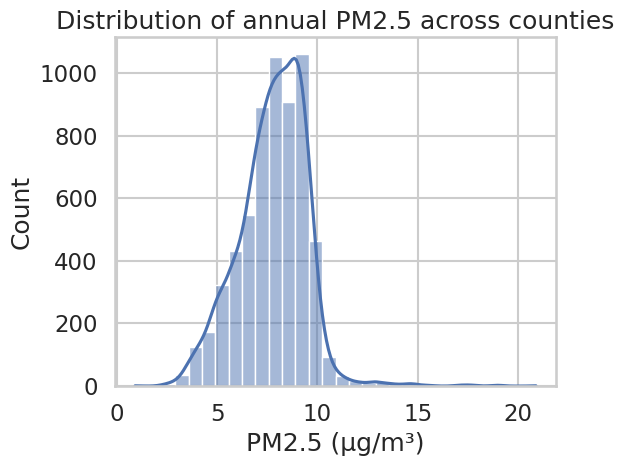

In [39]:
# PM2.5 histogram
plt.figure(figsize=(6, 5))
sns.histplot(full[pm_col], bins=30, kde=True)
plt.title("Distribution of annual PM2.5 across counties")
plt.xlabel("PM2.5 (µg/m³)")
plt.tight_layout()


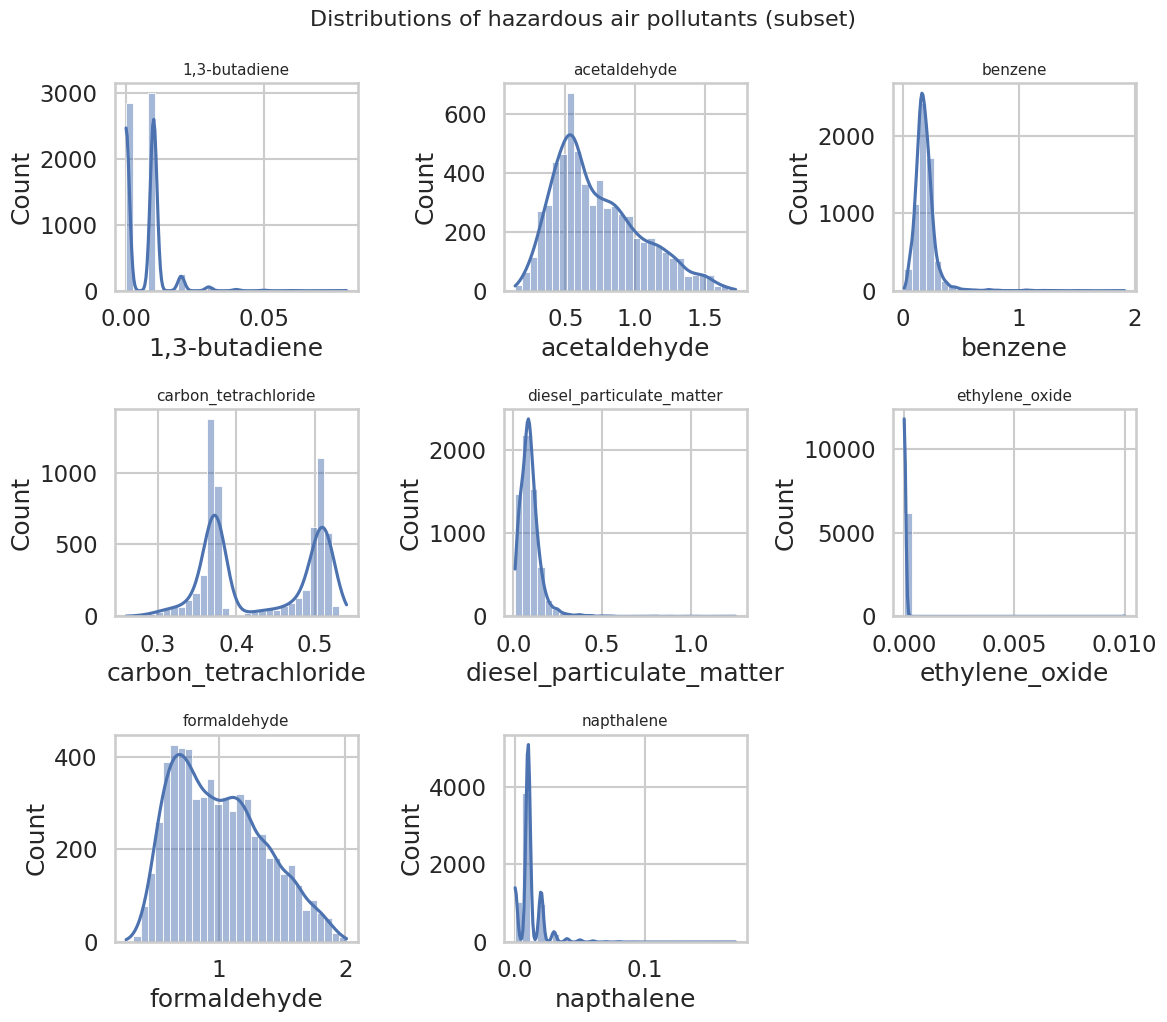

In [40]:
# Grid of pollutant histograms (subset for readability)
max_polluts = min(9, len(pollutant_cols))
cols_to_plot = pollutant_cols[:max_polluts]

n = len(cols_to_plot)
if n > 0:
    n_cols = 3
    n_rows = int(np.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, cols_to_plot):
        sns.histplot(full[col], bins=30, kde=True, ax=ax)
        ax.set_title(col, fontsize=11)
        ax.set_xlabel(col)

    for j in range(len(cols_to_plot), len(axes)):
        axes[j].set_visible(False)

    fig.suptitle("Distributions of hazardous air pollutants (subset)", fontsize=16)
    fig.tight_layout()


#### Section 3 – How polluted are U.S. counties?

The PM2.5 summary statistics and histogram show that most counties fall in a **moderate pollution range**. The 25th–75th percentiles are roughly 6.5–8.9 µg/m³, with a mean around 7.8 µg/m³. The histogram has a single main peak between about 7 and 9 µg/m³ and then a thinning right tail extending out toward ~15–20 µg/m³. This pattern suggests that while many counties experience fairly similar “typical” PM2.5 levels, a smaller number of counties are exposed to substantially higher concentrations.

The hazardous air pollutants exhibit even more pronounced **right-skew and heterogeneity**:

- Pollutants such as **1,3-butadiene, benzene, ethylene oxide, and naphthalene** are extremely concentrated near zero, with most counties having very low levels and a thin tail of higher exposures.
- **Acetaldehyde and formaldehyde** have wider spreads and more gradually decaying right tails, indicating larger differences between cleaner and more polluted counties for these aldehydes.
- **Carbon tetrachloride** and **diesel particulate matter** sit in relatively narrow but still skewed ranges, with noticeable variation but less extreme tails than some of the other toxics.

Because these distributions are skewed and often heavy-tailed, it is more informative to focus on **medians, quantiles, and distributional plots** rather than relying solely on means. For any later modeling, transformations (for example, log-scaling some pollutants) may help, but for EDA the key takeaway is that there is substantial variation in both PM2.5 and toxic air pollutants across U.S. counties—with some pollutants (notably the aldehydes) showing especially large differences between low- and high-exposure areas.


#### Section 4 – Exposure–outcome relationships

Correlations of exposures with asthma/COPD prevalence:


,asthma_prev,copd_prev
asthma_prev,1.000000,0.749530
copd_prev,0.749530,1.000000
acetaldehyde,0.339444,0.484562
formaldehyde,0.259288,0.467143
pm25,0.139687,0.249823
"1,3-butadiene",0.091614,-0.001172
napthalene,0.062021,-0.070529
benzene,0.017977,-0.047315
ethylene_oxide,-0.008576,-0.005124
carbon_tetrachloride,-0.062268,-0.023307


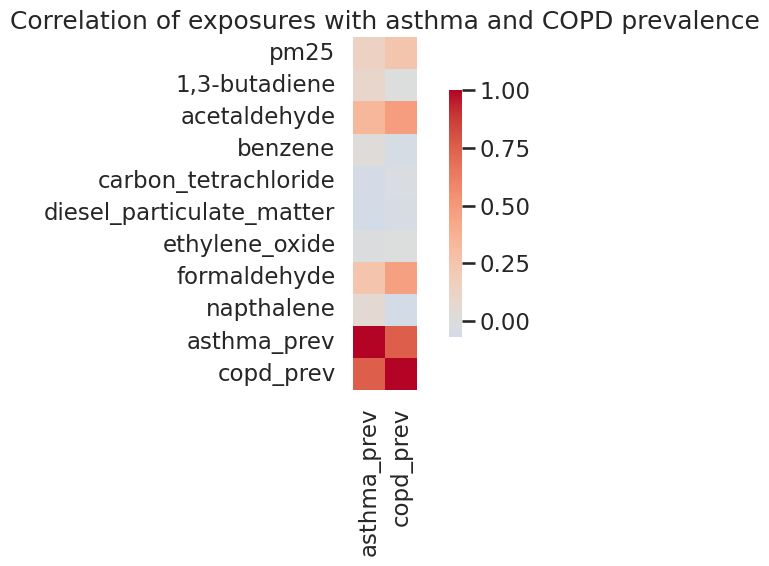

In [41]:
corr_vars = [pm_col] + pollutant_cols + outcome_cols
corr = full[corr_vars].corr()

print("Correlations of exposures with asthma/COPD prevalence:")
display(corr[outcome_cols].sort_values(by=outcome_cols, ascending=False))

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr[outcome_cols],
    annot=False,
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation of exposures with asthma and COPD prevalence")
plt.tight_layout()

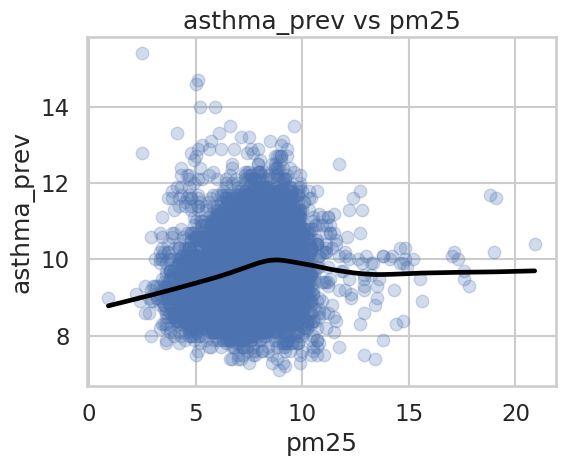

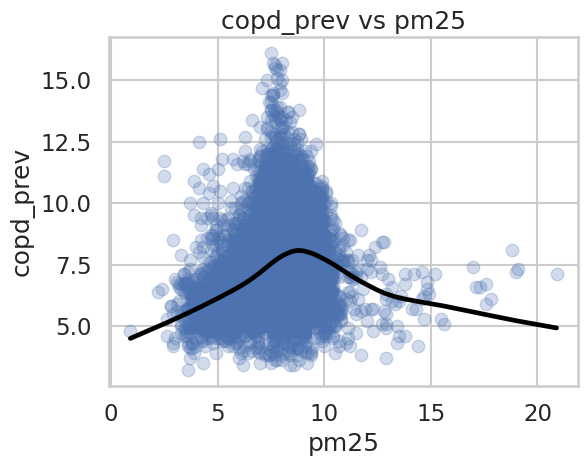

In [42]:
def scatter_with_smooth(data, x, y, alpha=0.25):
    """EDA helper: scatter + LOWESS-like trend."""
    plt.figure(figsize=(6, 5))
    sns.regplot(
        data=data,
        x=x,
        y=y,
        scatter_kws={"alpha": alpha},
        line_kws={"color": "black"},
        lowess=True
    )
    plt.title(f"{y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()

# PM2.5 vs outcomes
for y in outcome_cols:
    scatter_with_smooth(full, x=pm_col, y=y)


Top pollutants correlated with COPD prevalence:
['acetaldehyde', 'formaldehyde', 'napthalene']


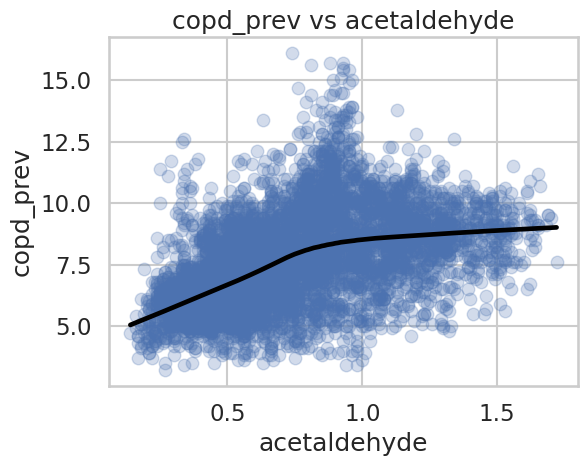

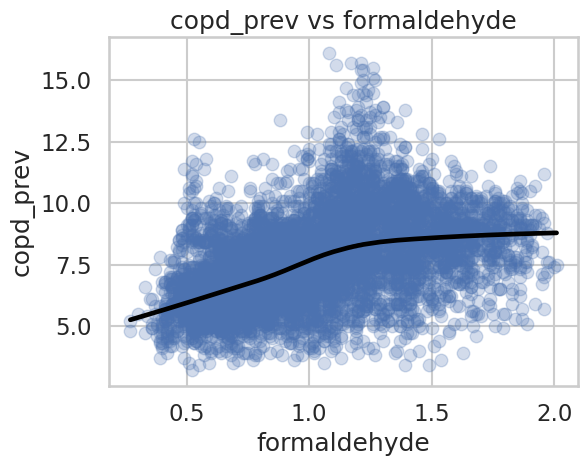

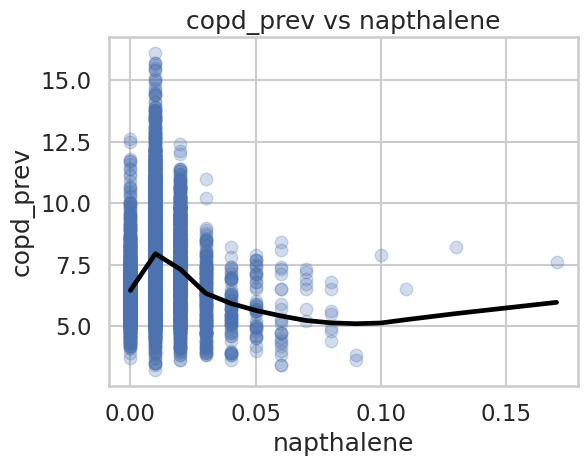

In [43]:
# Top 3 pollutants most correlated with COPD
copd_col = "copd_prev"
pollutant_corr = corr[copd_col].loc[pollutant_cols].abs().sort_values(ascending=False)
top_pollutants = pollutant_corr.head(3).index.tolist()

print("\nTop pollutants correlated with COPD prevalence:")
print(top_pollutants)

for p in top_pollutants:
    scatter_with_smooth(full, x=p, y=copd_col)


In [47]:
def quantile_summary(df, exposure, outcomes, q=4):
    labels = [f"Q{i+1}" for i in range(q)]
    df = df.copy()
    df[f"{exposure}_q"] = pd.qcut(df[exposure], q=q, labels=labels)
    return (
        df.groupby(f"{exposure}_q")[outcomes]
          .agg(["mean", "median", "count"])
    )

pm_q_summary = quantile_summary(full, pm_col, outcome_cols, q=4)
print("\nOutcome means/medians by PM2.5 quartile:")
display(pm_q_summary)



Outcome means/medians by PM2.5 quartile:


/tmp/ipython-input-2031610829.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{exposure}_q")[outcomes]


asthma_prev              copd_prev             
              mean median count      mean median count
pm25_q                                                
Q1        9.565916    9.5  1643  6.497931    6.2  1643
Q2        9.844444    9.8  1485  7.884983    7.6  1485
Q3       10.017490   10.1  1538  8.195579    8.2  1538
Q4        9.914647    9.9  1543  7.820091    7.9  1543

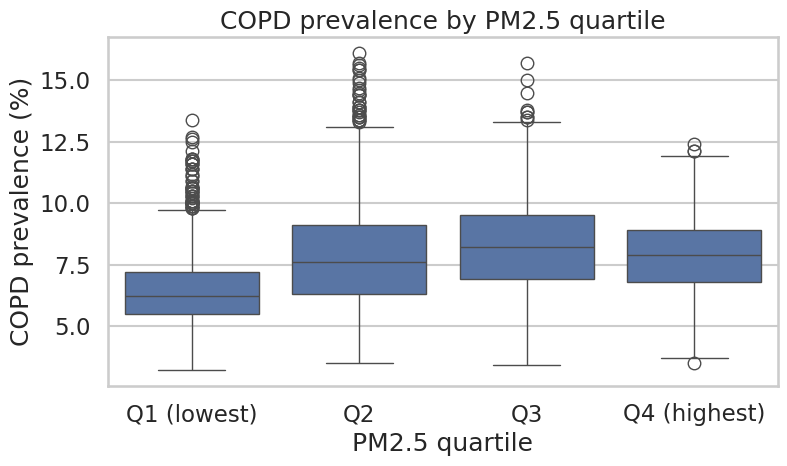

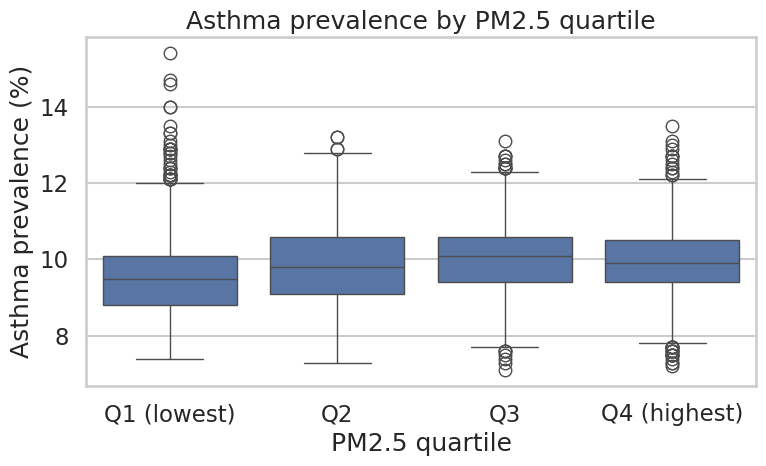

In [45]:
# Boxplots of outcomes by PM2.5 quartile
full_pm = full.copy()
full_pm["pm25_q"] = pd.qcut(full_pm[pm_col], 4, labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"])

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=full_pm,
    x="pm25_q",
    y="copd_prev"
)
plt.title("COPD prevalence by PM2.5 quartile")
plt.xlabel("PM2.5 quartile")
plt.ylabel("COPD prevalence (%)")
plt.tight_layout()

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=full_pm,
    x="pm25_q",
    y="asthma_prev"
)
plt.title("Asthma prevalence by PM2.5 quartile")
plt.xlabel("PM2.5 quartile")
plt.ylabel("Asthma prevalence (%)")
plt.tight_layout()



Outcome means/medians by acetaldehyde quartile:


/tmp/ipython-input-2031610829.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f"{exposure}_q")[outcomes]


asthma_prev              copd_prev             
                      mean median count      mean median count
acetaldehyde_q                                                
Q1                9.349068    9.2  1663  6.280938    6.1  1663
Q2                9.685885    9.7  1509  7.152883    7.1  1509
Q3               10.105404   10.1  1499  8.325350    8.1  1499
Q4               10.227243   10.2  1538  8.672237    8.7  1538

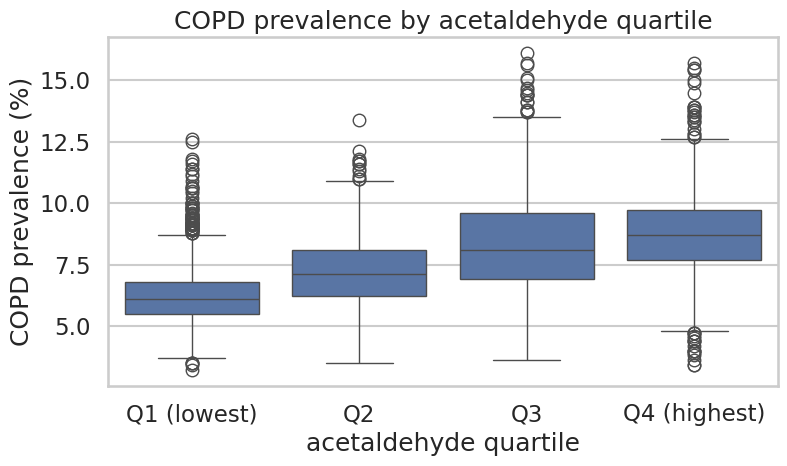

In [46]:
# Quartiles & boxplots for the strongest pollutant
main_pollutant = top_pollutants[0] if len(top_pollutants) > 0 else pollutant_cols[0]
pol_q_summary = quantile_summary(full, main_pollutant, outcome_cols, q=4)
print(f"\nOutcome means/medians by {main_pollutant} quartile:")
display(pol_q_summary)

full_pol = full.copy()
full_pol[f"{main_pollutant}_q"] = pd.qcut(
    full_pol[main_pollutant], 4,
    labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"]
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=full_pol,
    x=f"{main_pollutant}_q",
    y="copd_prev"
)
plt.title(f"COPD prevalence by {main_pollutant} quartile")
plt.xlabel(f"{main_pollutant} quartile")
plt.ylabel("COPD prevalence (%)")
plt.tight_layout()


#### Section 4 – How do exposures relate to asthma and COPD?

The correlation table and heatmap summarize how each exposure is associated with `asthma_prev` and `copd_prev`. As expected, `asthma_prev` and `copd_prev` are strongly correlated with each other (≈ 0.75), reflecting shared risk factors. Among the pollutants, the **aldehydes stand out**: acetaldehyde has correlations of about 0.34 with asthma and 0.48 with COPD, and formaldehyde has correlations of about 0.26 with asthma and 0.47 with COPD. PM2.5 is more weakly but still positively associated with both outcomes (≈ 0.14 with asthma and 0.25 with COPD). In contrast, 1,3-butadiene, benzene, naphthalene, ethylene oxide, carbon tetrachloride, and diesel particulate matter show correlations very close to zero (or slightly negative), suggesting much weaker or no clear linear association with county-level asthma/COPD prevalence.

The scatterplots with LOWESS curves add detail about the *shape* of these relationships. For PM2.5, asthma prevalence gently increases from low to moderate PM2.5 levels and then flattens out at higher concentrations, indicating a modest, mostly positive association with possible saturation at the upper end. COPD prevalence shows a **hump-shaped** pattern: it rises from low PM2.5 to a peak around moderate PM2.5 values and then declines slightly at the very highest concentrations. This suggests that COPD is highest in counties with moderately elevated PM2.5, but many other factors (smoking, demographics, access to care) are likely interacting with air pollution. In contrast, COPD versus acetaldehyde and formaldehyde displays a clearer **monotonic upward trend**: the LOWESS line steadily increases across the observed range of each aldehyde, consistent with the stronger positive correlations seen in the table. The relationship with naphthalene is much weaker and non-monotonic, which matches its near-zero correlation with COPD.

The quartile summaries and boxplots provide a robust, non-parametric view of how disease burden changes across exposure levels. For PM2.5, both the **mean and median** asthma and COPD prevalence rise from the lowest quartile (Q1) to the third quartile (Q3). COPD prevalence, for example, increases from roughly **6–6.5% in Q1** to around **8% in Q3**, before dipping slightly in Q4 while still remaining higher than Q1. Asthma shows a smaller but similar upward shift. When we group by acetaldehyde quartiles, the pattern is even more monotonic: COPD prevalence climbs from about **6.3% in the lowest acetaldehyde quartile** to roughly **8.7% in the highest quartile**, and asthma prevalence also increases steadily from around 9.3% to about 10.2%. These boxplots visually confirm that counties in the highest aldehyde and PM2.5 ranges tend to have higher typical COPD (and to a lesser extent asthma) prevalence than those in the cleanest quartiles.

Overall, these analyses are well aligned with the data’s properties. Correlations summarize overall strength and direction, scatterplots with smooth trends reveal non-linear shapes and heterogeneity, and quartile-based summaries show how typical disease burden shifts across exposure levels while remaining robust to skewness and outliers. Taken together, they provide a coherent, data-driven picture in which **aldehydes (especially acetaldehyde and formaldehyde) and, more modestly, PM2.5 are positively associated with county-level COPD and asthma prevalence**, with the clearest and strongest signal observed for COPD.



#### Section 5 – Geographic variation by state

,pm25,asthma_prev,copd_prev
state,,,
Kentucky,8.427917,10.844583,11.047083
West Virginia,7.500909,11.271818,10.750000
Tennessee,7.837895,10.490000,9.908947
Alabama,8.993284,10.652985,9.047761
Arkansas,9.075333,10.314667,9.026000
Louisiana,9.007031,10.005469,8.959375
Missouri,8.019565,10.218696,8.875652
Mississippi,9.110976,10.699390,8.782317
Ohio,8.971023,10.098864,8.696591


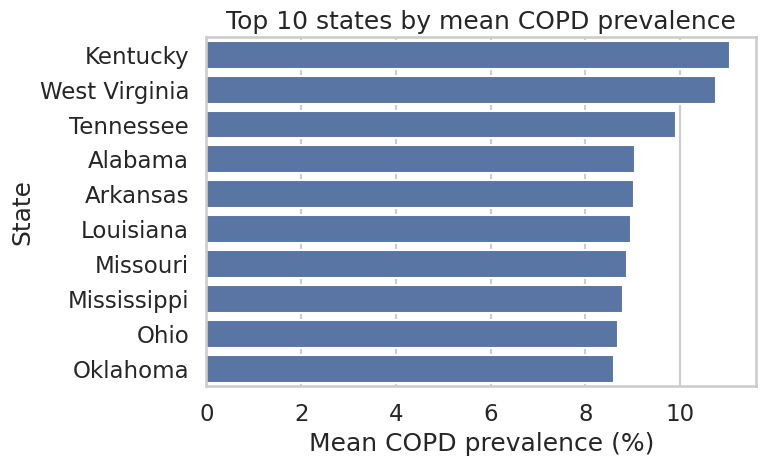

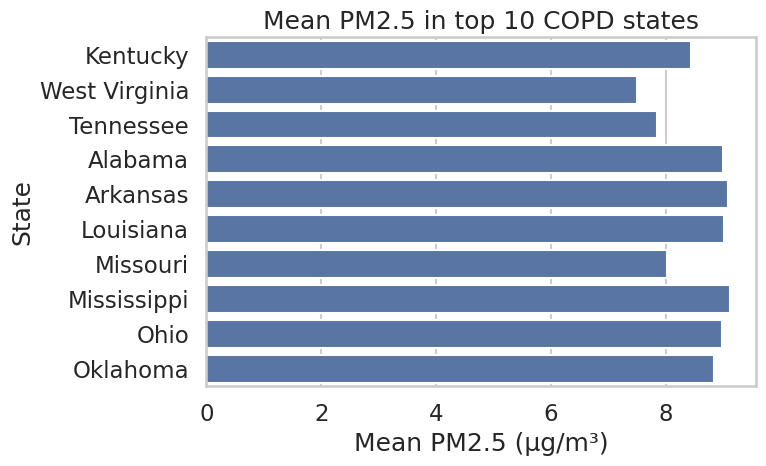

In [48]:
if "state" in full.columns:
    state_summary = (
        full.groupby("state")[[pm_col] + outcome_cols]
            .mean()
            .sort_values(by="copd_prev", ascending=False)
    )

    display(state_summary.head(10))

    top_n = 10
    # COPD barplot
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=state_summary.reset_index().head(top_n),
        x="copd_prev",
        y="state"
    )
    plt.title(f"Top {top_n} states by mean COPD prevalence")
    plt.xlabel("Mean COPD prevalence (%)")
    plt.ylabel("State")
    plt.tight_layout()

    # PM2.5 barplot (same states)
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=state_summary.reset_index().head(top_n),
        x=pm_col,
        y="state"
    )
    plt.title(f"Mean PM2.5 in top {top_n} COPD states")
    plt.xlabel("Mean PM2.5 (µg/m³)")
    plt.ylabel("State")
    plt.tight_layout()

#### Section 5 – Geographic patterns across states

The state-level summaries reveal clear **geographic clustering** of COPD burden. The top 10 states by mean COPD prevalence are:

**Kentucky, West Virginia, Tennessee, Alabama, Arkansas, Louisiana, Missouri, Mississippi, Ohio, and Oklahoma.**

In these states, average COPD prevalence is around **8–11%**, with Kentucky and West Virginia at the top (above 11% and 10.5%, respectively). This confirms that COPD is not evenly distributed across the U.S.; it is concentrated in an Appalachian / southeastern / lower–Midwest belt.

The second barplot, which shows **mean PM2.5 for the same top-COPD states**, tells a more nuanced story. These states generally have **moderate-to-high PM2.5** (roughly 7–8.5 µg/m³), but they are not dramatically more polluted than one another, and the ranking of PM2.5 does not perfectly match the ranking of COPD. For example, Kentucky and West Virginia do have relatively high PM2.5 and high COPD, but some states (like Ohio or Oklahoma) have similar PM2.5 levels yet slightly lower COPD prevalence, while others with comparable PM2.5 elsewhere in the country do not appear in the top-10 COPD list at all.

This mismatch between the exact ordering of PM2.5 and COPD suggests that **air pollution alone cannot explain the geographic pattern of COPD**. Other state-level factors—such as smoking rates, occupational exposures (e.g., mining), age structure, poverty, and access to healthcare—likely interact with air quality to produce the observed disease burden.

Taken together with the county-level analyses, these maps of state means show that respiratory disease and air quality exhibit both **local variation** (between counties) and **regional structure** (between states). Any later modeling should account for this spatial context—either by including state/regional indicators or by interpreting results with potential geographic confounding in mind.



## Ethics

X For this project, we’re using public datasets from reliable government sources like the Environmental Protection Agency (EPA) and the Centers for Disease Control and Prevention (CDC).
X The data include county-level information about hazardous air toxics such as benzene, diesel particulate matter, formaldehyde, acetaldehyde, carbon tetrachloride, 1,3-butadiene, naphthalene, and ethylene, along with health statistics like asthma and COPD prevalence.
X Since these datasets are publicly available and aggregated, no individual-level or private information is used, so informed consent and data privacy concerns are not applicable.

X However, some ethical concerns still exist. Not all counties have the same level of air-quality monitoring, which could lead to less accurate pollutant estimates in rural or underrepresented areas.
X Health data may also underrepresent some populations due to differences in access to healthcare and reporting systems, which could introduce bias.
X We will address these limitations in our discussion to ensure transparency and fairness.
X Another ethical consideration is communication, as showing maps or rankings of high-pollution areas could unintentionally stigmatize communities.
X To prevent this, we will frame results in terms of environmental and structural inequalities such as proximity to industrial zones, traffic corridors, or wildfire-prone regions rather than implying blame.
X Our overall goal is to raise awareness about the connection between air quality and public health while maintaining accuracy, fairness, and respect for affected communities.

Instructions: Keep the contents of this cell. For each item on the checklist
- put an X there if you've considered the item
- IF THE ITEM IS RELEVANT place a short paragraph after the checklist item discussing the issue.

Items on this checklist are meant to provoke discussion among good-faith actors who take their ethical responsibilities seriously. Your teams will document these discussions and decisions for posterity using this section. You don't have to solve these problems, you just have to acknowledge any potential harm no matter how unlikely.

Here is a list of real world examples for each item in the checklist that can refer to.



### A. Data Collection
 - [X] A.1 Informed consent: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

> Example of how to use the checkbox, and also of how you can put in a short paragraph that discusses the way this checklist item affects your project. Remove this paragraph and the X in the checkbox before you fill this out for your project

 - [ ] A.2 Collection bias: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] A.3 Limit PII exposure: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] A.4 Downstream bias mitigation: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [ ] B.1 Data security: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] B.2 Right to be forgotten: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] B.3 Data retention plan: Is there a schedule or plan to delete the data after it is no longer needed?

### C. Analysis
 - [ ] C.1 Missing perspectives: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [ ] C.2 Dataset bias: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [ ] C.3 Honest representation: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] C.4 Privacy in analysis: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [ ] C.5 Auditability: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

### D. Modeling
 - [ ] D.1 Proxy discrimination: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] D.2 Fairness across groups: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] D.3 Metric selection: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] D.4 Explainability: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] D.5 Communicate limitations: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

### E. Deployment
 - [ ] E.1 Monitoring and evaluation: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
 - [ ] E.2 Redress: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] E.3 Roll back: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] E.4 Unintended use: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

## Team Expectations

* Our form of communication will be through Discord messages, and we will call each Wednesday to collaborate as needed. Upon seeing the message, members will try to respond as soon as possible.
* Members will speak with integrity and modesty, avoiding over-the-top bluntness when possible. Treat each other with politeness and work through conflicts in a respectful manner.
* All decisions will be unanimous, and they will be finalized upon agreement amongst all members. No one person will have more of a say or authority over a certain decision over another. If a decision must be made under time pressure, those that are available in chat will decide.
* Members will rotate roles each week, splitting the workload of data finding, wrangling, analysis, visualization, and conclusions. Members will see progress through GitHub, as we will work in pull requests and update each other on discord.
* Members will refer to the timeline at the bottom of this page.
* Failure to meet expectations or contributions will be addressed through messaging on discord. Continued underperformance and lack of response will be dealt with by contacting our assigned TA, as well as by reporting this in the weekly group survey as needed. Members that are actively struggling despite effort will communicate this and the other members will step in to help where they can.

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/29  |  2 PM | Brianstorm different possible research questions/topics; have a list prepared  | Agree on the best form of communication and meeting times; Finalize project topic; carry out collabortive background research; finish project proposal |
| 11/5  |  2 PM |  Have general domain knowledge and get used to recurring verbiage | Narrow down data sets to use, features to look for; continue searching for more datasets and article sources |
| 11/12  | 2 PM  | Finalize list of datasets and features to hone in on  | Assign each group member to specific roles; begin data wrangling using smaller number of datasets to be used; complete check in #1 (Data) |
| 11/19  | 2 PM  | Continue wrangle data, make decisions about datasets and whether to use them (Zonglin, Ben, Elaine); begin EDA (Zonglin, Meshall) | Review wrangling and EDA, discuss suitable forms of analysis and data visualization  |
| 11/26  | 2 PM  | Finalize wrangling (Mohammed); proofread wrangling, finalize EDA (Ben); proofread wrangling, start analysis (Elaine, Zonglin, Meshall) | Continue analysis, final group check over wrangling/EDA, complete check in #2 (EDA) |
| 12/3  | 2 PM  | Finalize analysis; write up most of results and conclusion | Finalize results and conclusion; finalize discussion |
| 12/10  | 12 PM  | Proofread discussion | Final cumulative check as a group; sanity checks; turn in final project, team surveys, and post-surveys
 |